# Regression models

## 1. Data import

<Axes: xlabel='x', ylabel='y'>

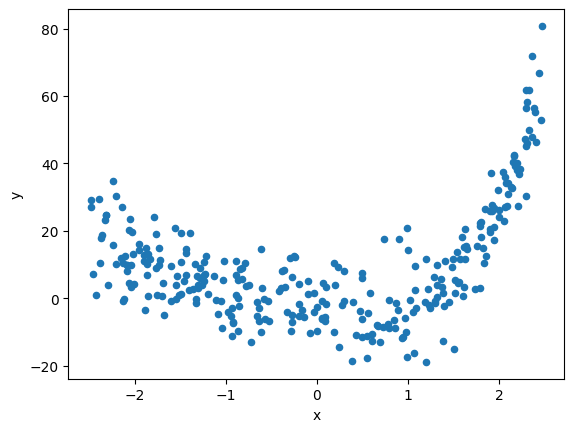

In [1]:
import numpy as np
import pandas as pd

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4  # we add noise to our function to create challange for our regression models
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')


**We have to rotate this vector form vertical to horizontal**

In [2]:
print(X.shape)
X = X.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
y = y.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
print(X.shape)

(300,)
(300, 1)


**We split the datset into training and testing sample in proportion 80/20**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True) # no random_state=42

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 1) (240, 1)
(60, 1) (60, 1)


## 2. Linear regression

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [5]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [6]:
lin_reg.score(X_train,y_train)

0.1413063894643528

In [7]:
# theta_zero = lin_reg.intercept_
# theta_one = lin_reg.coef_

**Comparison of actual data and the proposed prediction:**

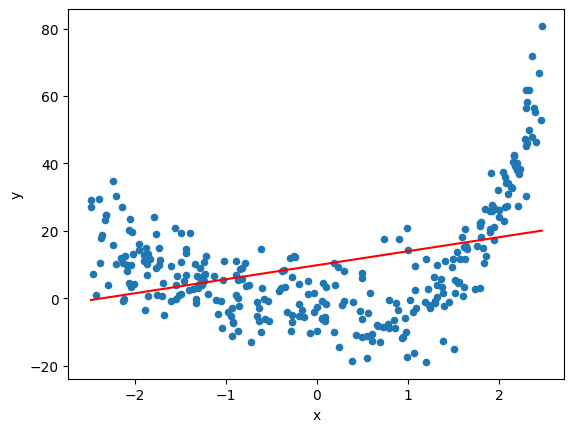

In [8]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x', y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_print_pred =  lin_reg.predict(X_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='linear regression') 

**We calculate the mean_squared_error which measures the sum of length^2 of our prediction to original data**

In [9]:
from sklearn.metrics import mean_squared_error

lin_train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {lin_train_mse}')
lin_test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {lin_test_mse}')

Training Mean Squared Error (MSE): 243.04877330564184
Testing Mean Squared Error (MSE): 300.4131315367284


## 3. k-Nearest Neighbours

**k=3 for KNN**

In [10]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3) # k = 3
knn_3_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
y_train_pred = knn_3_reg.predict(X_train)
y_test_pred = knn_3_reg.predict(X_test)

In [12]:
knn_3_reg.score(X_train, y_train)

0.844847829770431

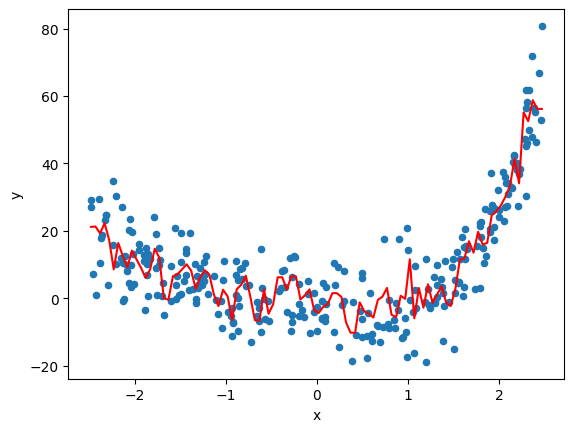

In [13]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x', y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_print_pred =  knn_3_reg.predict(X_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='k=3 knn regression') 

In [14]:
from sklearn.metrics import mean_squared_error

knn3_train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {knn3_train_mse}')
knn3_test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {knn3_test_mse}')

Training Mean Squared Error (MSE): 43.915017169490646
Testing Mean Squared Error (MSE): 94.63033170647394


**k=5 for KNN**

In [15]:
import sklearn.neighbors
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 5) # k = 5
knn_5_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [16]:
y_train_pred = knn_5_reg.predict(X_train)
y_test_pred = knn_5_reg.predict(X_test)

In [17]:
knn_5_reg.score(X_train, y_train)

0.8208492834646011

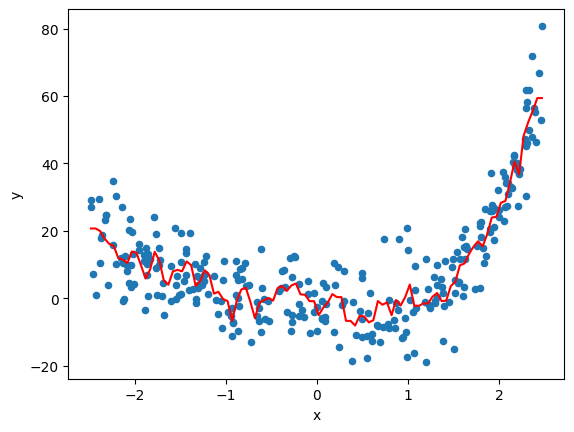

In [18]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x', y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_print_pred =  knn_5_reg.predict(X_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='k=5 knn regression') 

In [19]:
from sklearn.metrics import mean_squared_error

knn5_train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {knn5_train_mse}')
knn5_test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {knn5_test_mse}')

Training Mean Squared Error (MSE): 50.707681245693735
Testing Mean Squared Error (MSE): 81.39201052334344


## 4. Polynomial regression

**2-nd degree polynomial regression**

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2=PolynomialFeatures(degree=2,include_bias=False)
X_p2_train = poly_feature_2.fit_transform(X_train)
X_p2_test = poly_feature_2.fit_transform(X_test)
model_regression_2 = LinearRegression()
model_regression_2.fit(X_p2_train, y_train)

LinearRegression()

In [21]:
y_p2_train_pred = model_regression_2.predict(X_p2_train)
y_p2_test_pred = model_regression_2.predict(X_p2_test)

In [22]:
model_regression_2.score(X_p2_train,y_train)

0.6691550312517311

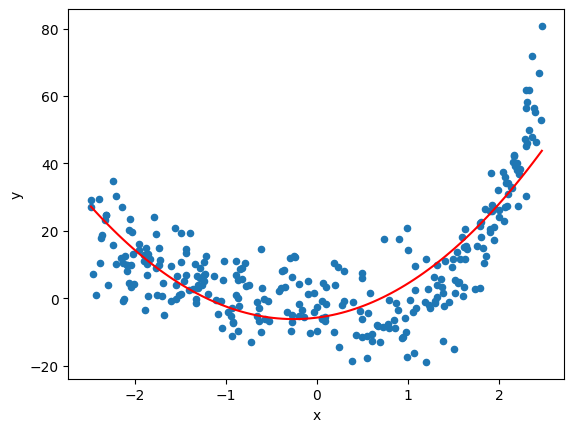

In [23]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x',y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_p2_print_pred = poly_feature_2.fit_transform(X_print_pred)
y_print_pred =  model_regression_2.predict(X_p2_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='2nd degree polynomial regression') 

In [24]:
from sklearn.metrics import mean_squared_error

p2_train_mse = mean_squared_error(y_train, y_p2_train_pred)
print(f'Training Mean Squared Error (MSE): {p2_train_mse}')
p2_test_mse = mean_squared_error(y_test, y_p2_test_pred)
print(f'Testing Mean Squared Error (MSE): {p2_test_mse}')

Training Mean Squared Error (MSE): 93.64395265320542
Testing Mean Squared Error (MSE): 113.01609711217239


**3-rd degree polynomial regression**

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_3=PolynomialFeatures(degree=3,include_bias=False)
X_p3_train = poly_feature_3.fit_transform(X_train)
X_p3_test = poly_feature_3.fit_transform(X_test)
model_regression_3 = LinearRegression()
model_regression_3.fit(X_p3_train, y_train)

LinearRegression()

In [26]:
y_p3_train_pred = model_regression_3.predict(X_p3_train)
y_p3_test_pred = model_regression_3.predict(X_p3_test)

In [27]:
model_regression_3.score(X_p3_train,y_train)

0.761668759896679

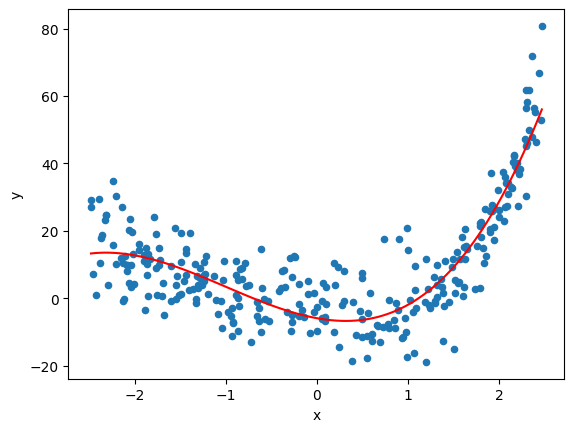

In [28]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x',y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_p3_print_pred = poly_feature_3.fit_transform(X_print_pred)
y_print_pred =  model_regression_3.predict(X_p3_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='3rd degree polynomial regression') 

In [29]:
from sklearn.metrics import mean_squared_error

p3_train_mse = mean_squared_error(y_train, y_p3_train_pred)
print(f'Training Mean Squared Error (MSE): {p3_train_mse}')
p3_test_mse = mean_squared_error(y_test, y_p3_test_pred)
print(f'Testing Mean Squared Error (MSE): {p3_test_mse}')

Training Mean Squared Error (MSE): 67.45842153336933
Testing Mean Squared Error (MSE): 70.49614042989255


**4-th degree polynomial regression**

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_4=PolynomialFeatures(degree=4,include_bias=False)
X_p4_train = poly_feature_4.fit_transform(X_train)
X_p4_test = poly_feature_4.fit_transform(X_test)
model_regression_4 = LinearRegression()
model_regression_4.fit(X_p4_train, y_train)

LinearRegression()

In [31]:
y_p4_train_pred = model_regression_4.predict(X_p4_train)
y_p4_test_pred = model_regression_4.predict(X_p4_test)

In [32]:
model_regression_4.score(X_p4_train,y_train)

0.7932781459665943

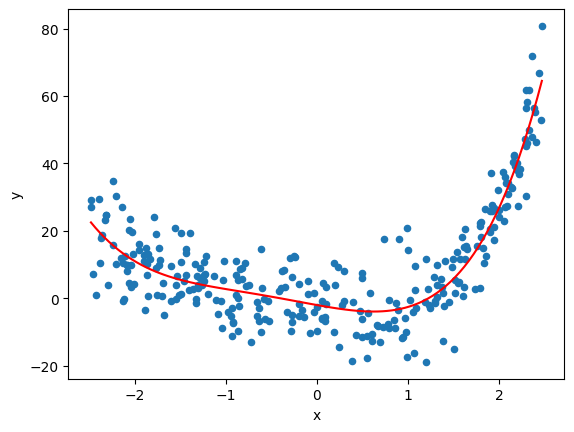

In [33]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x',y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_p4_print_pred = poly_feature_4.fit_transform(X_print_pred)
y_print_pred =  model_regression_4.predict(X_p4_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='4th degree polynomial regression') 

In [34]:
from sklearn.metrics import mean_squared_error

p4_train_mse = mean_squared_error(y_train, y_p4_train_pred)
print(f'Training Mean Squared Error (MSE): {p4_train_mse}')
p4_test_mse = mean_squared_error(y_test, y_p4_test_pred)
print(f'Testing Mean Squared Error (MSE): {p4_test_mse}')

Training Mean Squared Error (MSE): 58.51154873150351
Testing Mean Squared Error (MSE): 66.32453502172471


**5-th degree polynomial regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_5=PolynomialFeatures(degree=5,include_bias=False)
X_p5_train = poly_feature_5.fit_transform(X_train)
X_p5_test = poly_feature_5.fit_transform(X_test)
model_regression_5 = LinearRegression()
model_regression_5.fit(X_p5_train, y_train)

LinearRegression()

In [36]:
y_p5_train_pred = model_regression_5.predict(X_p5_train)
y_p5_test_pred = model_regression_5.predict(X_p5_test)

In [37]:
model_regression_5.score(X_p5_train,y_train)

0.7945326329343927

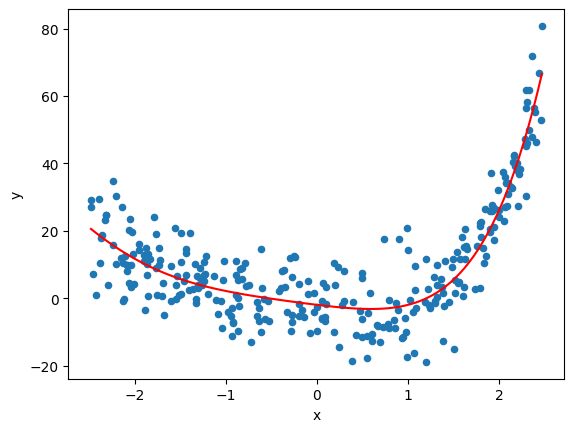

In [38]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x',y='y')

X_print_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_p5_print_pred = poly_feature_5.fit_transform(X_print_pred)
y_print_pred =  model_regression_5.predict(X_p5_print_pred)

plt.plot(X_print_pred, y_print_pred, color = 'red', label='5th degree polynomial regression') 

In [39]:
from sklearn.metrics import mean_squared_error

p5_train_mse = mean_squared_error(y_train, y_p5_train_pred)
print(f'Training Mean Squared Error (MSE): {p5_train_mse}')
p5_test_mse = mean_squared_error(y_test, y_p5_test_pred)
print(f'Testing Mean Squared Error (MSE): {p5_test_mse}')

Training Mean Squared Error (MSE): 58.15647270099581
Testing Mean Squared Error (MSE): 67.64119732645105


## 5. Result analysis - model accuracy comparison

**We can notice that more adequate regression models score smaller MSE (obviosuly), however there is small or no difference between MSE of 3,4,5th degree polynomial models**

In [42]:
models_mse = {"train_mse" : [lin_train_mse, knn3_train_mse, knn5_train_mse, p2_train_mse, p3_train_mse, p4_train_mse, p5_train_mse],
"test_mse" : [lin_test_mse, knn3_test_mse, knn5_test_mse, p2_test_mse, p3_test_mse, p4_test_mse, p5_test_mse]}

df_results = pd.DataFrame(data = models_mse, index = ['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])
print(df_results)

df_results.to_pickle("mse.pkl")

             train_mse    test_mse
lin_reg     243.048773  300.413132
knn_3_reg    43.915017   94.630332
knn_5_reg    50.707681   81.392011
poly_2_reg   93.643953  113.016097
poly_3_reg   67.458422   70.496140
poly_4_reg   58.511549   66.324535
poly_5_reg   58.156473   67.641197


**Puropose of the dataFrame "regression_models" created below is to store the info about the models used in this analysis**

In [41]:
regression_models = [(lin_reg, None),
                     (knn_3_reg, None),
                     (knn_5_reg, None),
                     (model_regression_2, poly_feature_2),
                     (model_regression_3, poly_feature_3),
                     (model_regression_4, poly_feature_4),
                     (model_regression_5, poly_feature_5)]
df_regression_models = pd.DataFrame(data = regression_models, 
index = ['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])

print(df_regression_models)
df_regression_models.to_pickle("reg.pkl")



                                             0  \
lin_reg                     LinearRegression()   
knn_3_reg   KNeighborsRegressor(n_neighbors=3)   
knn_5_reg                KNeighborsRegressor()   
poly_2_reg                  LinearRegression()   
poly_3_reg                  LinearRegression()   
poly_4_reg                  LinearRegression()   
poly_5_reg                  LinearRegression()   

                                                           1  
lin_reg                                                 None  
knn_3_reg                                               None  
knn_5_reg                                               None  
poly_2_reg            PolynomialFeatures(include_bias=False)  
poly_3_reg  PolynomialFeatures(degree=3, include_bias=False)  
poly_4_reg  PolynomialFeatures(degree=4, include_bias=False)  
poly_5_reg  PolynomialFeatures(degree=5, include_bias=False)  
